In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
#load integrated data
total_dataset = pd.read_csv('../data/integrated_data.csv')
total_dataset.head()

,Unnamed: 0,District,Rooms,Male emp. Agriculture,Male emp. Industry,Male emp. Services,Total Male Employment,Female emp. Agriculture,Female emp. Industry,Female emp. Services,...,Extortion,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs"
0,0,Ampara,610,13.8,19.0,26.9,59.7,1.8,4.1,44.7,...,2,232,242,1,0,1,2,1,0,1
1,1,Anuradhapura,979,3.7,6.0,27.0,36.7,1.7,5.5,18.0,...,9,270,584,6,0,23,2,4,1,7
2,2,Badulla,765,17.0,9.9,21.5,48.4,23.7,4.8,17.3,...,1,138,296,1,0,2,0,3,0,20
3,3,Batticaloa,883,20.9,18.1,26.0,64.9,2.1,4.0,33.2,...,4,225,221,1,0,6,3,1,1,3
4,4,Colombo,7519,1.1,20.6,42.9,64.7,1.3,20.0,50.5,...,37,1736,2809,4,0,52,1,21,6,573


In [4]:
fp1 = "../data/map_shape/LKA_adm1.shp"
map_df_1 = gpd.read_file(fp1)
map_df_1.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,217,LKA,Sri Lanka,1,Ampara,Distrikkaya,District,None,Amparai,(POLYGON ((81.78319549560564 7.448750019073543...
1,217,LKA,Sri Lanka,2,Anuradhapura,Distrikkaya,District,None,None,"POLYGON ((80.79398345947294 8.917964935302848,..."
2,217,LKA,Sri Lanka,3,Badulla,Distrikkaya,District,None,None,"POLYGON ((80.98494720458979 7.61256122589117, ..."
3,217,LKA,Sri Lanka,4,Batticaloa,Distrikkaya,District,None,None,(POLYGON ((81.80958557128912 7.494583129882926...
4,217,LKA,Sri Lanka,5,Colombo,Distrikkaya,District,None,None,(POLYGON ((79.90155029296903 6.714582920074406...


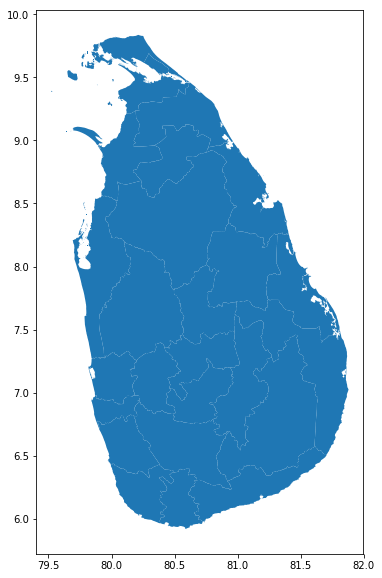

In [5]:
map_df_1.plot(figsize=(20,10)) #base map for sri lanka

In [6]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df_1.set_index("NAME_1").join(total_dataset.set_index("District"))
merged.head()

,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Unnamed: 0,...,Extortion,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs"
NAME_1,,,,,,,,,,,,,,,,,,,,,
Ampara,217,LKA,Sri Lanka,1,Distrikkaya,District,None,Amparai,(POLYGON ((81.78319549560564 7.448750019073543...,0,...,2,232,242,1,0,1,2,1,0,1
Anuradhapura,217,LKA,Sri Lanka,2,Distrikkaya,District,None,None,"POLYGON ((80.79398345947294 8.917964935302848,...",1,...,9,270,584,6,0,23,2,4,1,7
Badulla,217,LKA,Sri Lanka,3,Distrikkaya,District,None,None,"POLYGON ((80.98494720458979 7.61256122589117, ...",2,...,1,138,296,1,0,2,0,3,0,20
Batticaloa,217,LKA,Sri Lanka,4,Distrikkaya,District,None,None,(POLYGON ((81.80958557128912 7.494583129882926...,3,...,4,225,221,1,0,6,3,1,1,3
Colombo,217,LKA,Sri Lanka,5,Distrikkaya,District,None,None,(POLYGON ((79.90155029296903 6.714582920074406...,4,...,37,1736,2809,4,0,52,1,21,6,573


In [7]:
def plot_map(data_frame,variable):
    vmin, vmax = 120, 220
    fig, ax = plt.subplots(1, figsize=(20, 10))
    data_frame.plot(variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    #ax.axis(‘off’)
    ax.set_title(variable +' in Sri Lanka', fontdict={'fontsize': '25', 'fontweight' : '3'})
    # Create colorbar as a legend
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)

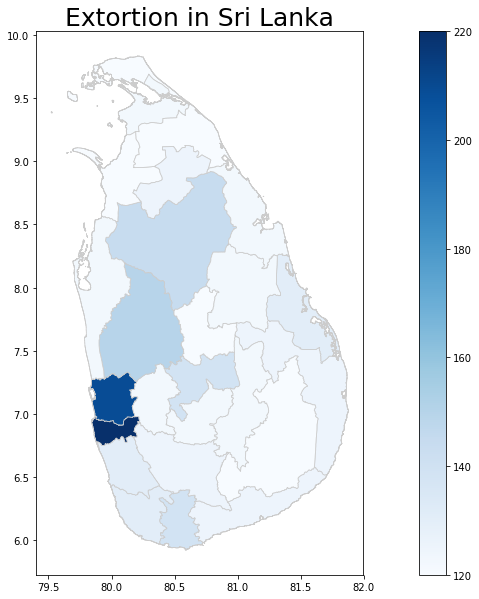

In [8]:
plot_map(merged,'Extortion')

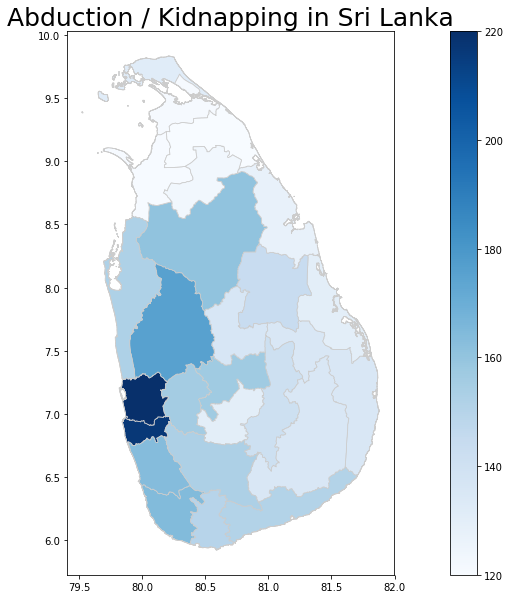

In [9]:
plot_map(merged,'Abduction / Kidnapping')

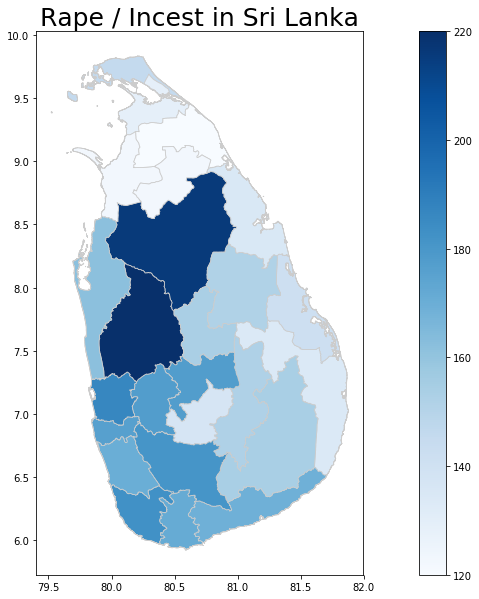

In [42]:
plot_map(merged,'Rape / Incest')

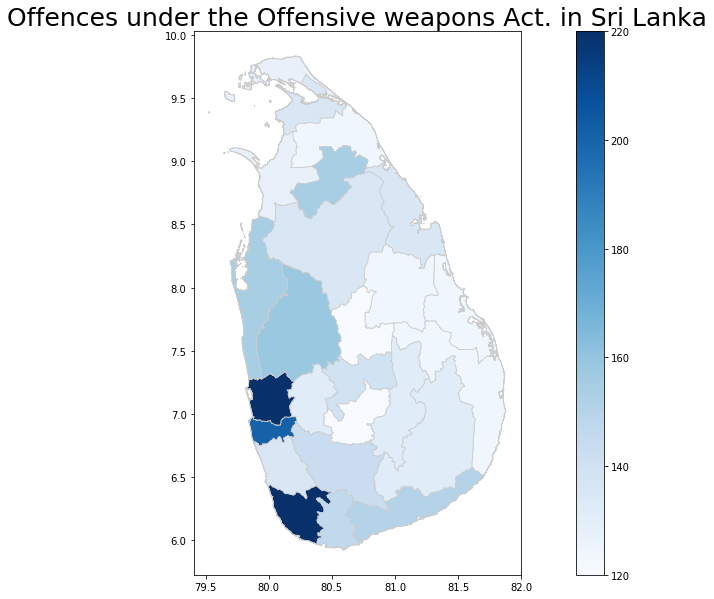

In [11]:
plot_map(merged,'Offences under the Offensive weapons Act.')